In [121]:
import numpy as np
import pydtmc
import matplotlib.pyplot as plt 
from tensorflow import keras 
from keras.models import Sequential
from keras.layers import Dense

In [122]:
max_num_nodes = 2**(8)
q = 0.4
p = (1-q)/2
num_iters = 200
states = [str(i) for i in range(max_num_nodes)]
# eps = 0.1
# length_of_trial = int(65/((1-0.04**eps)**2))
length_of_trial = 100
print(f"Length of trial is l={length_of_trial:.2f}")
print(f"Predicted bound on relative error for l={length_of_trial:.2f} is eps={np.log(1 - np.sqrt(65/length_of_trial))/np.log(0.04):.2f}")

Length of trial is l=100.00
Predicted bound on relative error for l=100.00 is eps=0.51


In [123]:
def gen_transition_matrix(n, p, q):
    # generate TPM for n states
    tpm = []
    for i in range(n):
        row = [0]*(n)
        if(i==0):
            row[0] = q
            row[1] = 1-q 
        elif(i==n-1):
            row[n-2] = 1-q
            row[n-1] = q 
        else:
            row[i-1] = 1-p-q
            row[i] = q
            row[i+1] = p
        tpm.append(row)
    return tpm

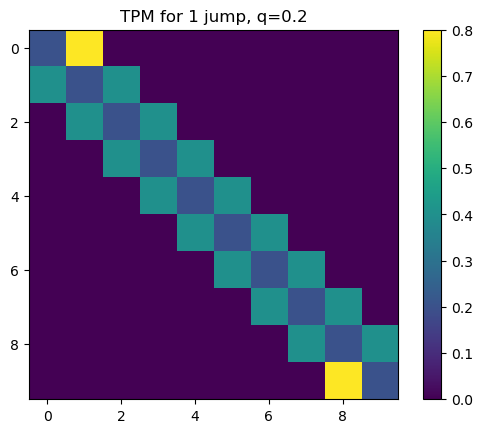

In [127]:
q = 0.2
p = (1-q)/2
n=10
p1 = np.array(gen_transition_matrix(n, p, q))
# print(p1)
plt.imshow(p1)
plt.title("TPM for 1 jump, q=0.2")
plt.colorbar()
plt.savefig("./plots/tpm_j1.png")

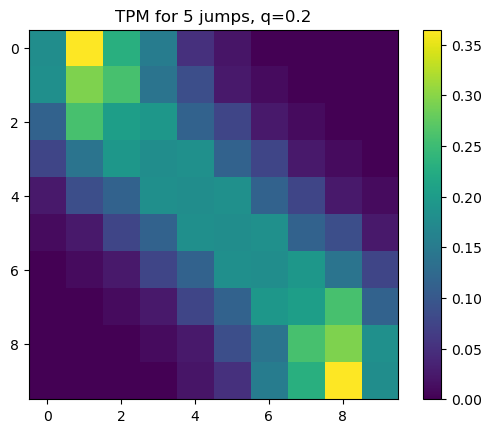

In [128]:
pn = np.linalg.matrix_power(p1, 5)
# np.set_printoptions(precision=3)
plt.imshow(pn)
plt.colorbar()
plt.title("TPM for 5 jumps, q=0.2")
plt.savefig("./plots/tpm_j5.png")
# print(pn)

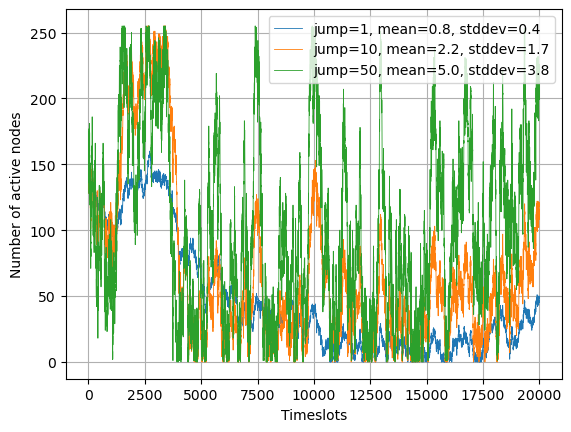

In [131]:
q = 0.2
p = (1-q)/2
n=2**8
p1 = np.array(gen_transition_matrix(n, p, q))
num_iters=20000
for jump in [1, 10, 50]:
    pn = np.linalg.matrix_power(p1, jump)
    states = [str(i) for i in range(n)]
    mc = pydtmc.MarkovChain(pn, states)
    curr_state = str(int(n/2))
    steps = mc.simulate(num_iters, curr_state, seed=0)
    states = np.array([int(elem) for elem in steps])
    diff = np.abs(states[1:] - states[:-1])
    stddev_jump = np.std(diff)
    avg_jump = np.mean(diff)
    plt.plot(states, label=f"jump={jump}, mean={avg_jump:.1f}, stddev={stddev_jump:.1f}", linewidth=0.6)
plt.legend()
plt.grid()
plt.ylabel("Number of active nodes")
plt.xlabel("Timeslots")
plt.savefig("./plots/jump_trajectory.png")